### python opencv入門輪廓特徵

https://blog.csdn.net/tengfei461807914/article/details/76626631

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./server/img/10272673126340.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,127,255,0)


plt.figure(1,figsize=(14,14))
plt.subplot(1,2,1)
plt.imshow(thresh)


contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("there are " + str(len(contours)) + " contours")


cnt = contours[10000]
print("there are " + str(len(cnt)) + " points in contours[0]")
approx = cv2.approxPolyDP(cnt,30,True)
print("after approx, there are " + str(len(approx)) + " points")
print(approx)
cv2.drawContours(img,[approx],-1,(255,0,0),-1)


plt.figure(1,figsize=(14,14))
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

### 讀取圖片 BGR2HSV

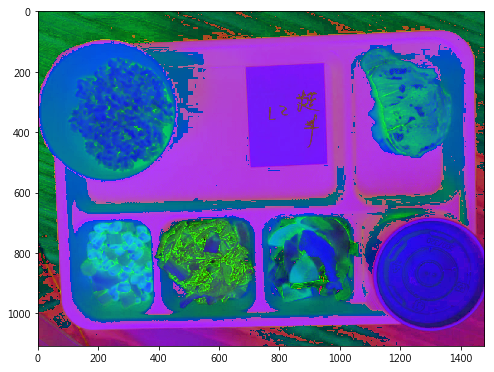

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./測試用/10278810890694.jpg')
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  
plt.figure(figsize=(8,8))
plt.imshow(hsv)
plt.show()

### 過濾 mask

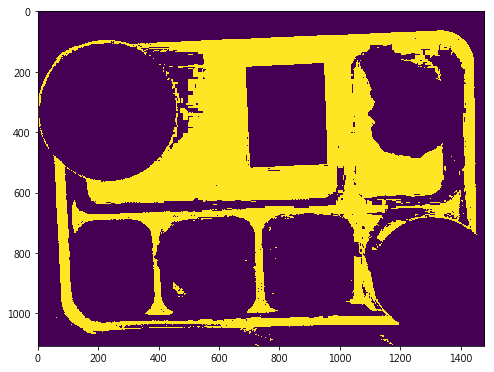

In [13]:
lower_red = np.array([0, 40, 90])  #5, 90, 70  4, 65, 0
upper_red = np.array([9, 160, 255]) #9, 160, 255  8, 155, 255
mask1=cv2.inRange(hsv,lower_red,upper_red)

lower_red2 = np.array([160, 40, 90])  #5, 90, 70
upper_red2 = np.array([180, 160, 255]) #9, 160, 255
mask2=cv2.inRange(hsv,lower_red2,upper_red2)

#mask=mask1+mask2
mask=mask2

plt.figure(figsize=(8,8))
plt.imshow(mask)
plt.show()

###  二值化 Binary

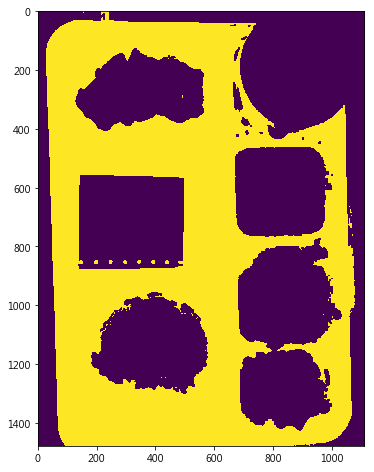

In [3]:
binary=cv2.threshold(mask,127,255,cv2.THRESH_BINARY)[1]
binary=cv2.dilate(binary,None,iterations=2)
binary=cv2.erode(binary,None,iterations=2)  
plt.figure(figsize=(8,8))
plt.imshow(binary)
plt.show()

### 找輪廓

https://gogoprivateryan.blogspot.com/2015/08/opencv-2-opencv-python.html

https://dotblogs.com.tw/coding4fun/2017/11/10/101416

there are 10 contours
max arcLength 5407.7240797281265


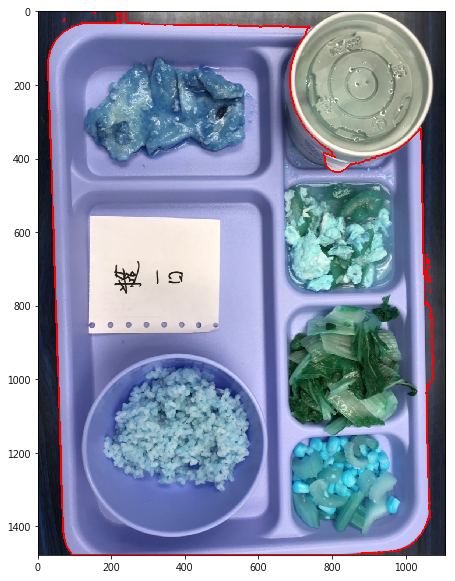

In [4]:
#contours, hiera = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hiera = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("there are " + str(len(contours)) + " contours")

# 找最大輪廓
sorted_cnts=sorted(contours,key=cv2.contourArea,reverse=True)
cnt=sorted_cnts[0]
# n=0
# ind=[]
# for cnt in contours:        
#     #print("there are " + str(len(cnt)) + " points in contours" + '[{}]'.format(n) )
#     #print(cnt)
#     n+=1
#     ind.append(len(cnt))
# a=ind.index(max(ind))
# #print(a)

#輪廓周長
perimeter = cv2.arcLength(cnt,True)
print("max arcLength {}".format(perimeter))

cntimg = cv2.drawContours(img.copy(), contours , -1, (255,0,0), 3)
#cntimg = cv2.drawContours(img.copy(), cnt , -1, (255,0,0), 3)
plt.figure(figsize=(10,10))
plt.imshow(cntimg)
plt.show()

### approxPolyDP(多邊形逼近 )

https://blog.csdn.net/tengfei461807914/article/details/76626631

In [1]:
print("there are " + str(len(cnt)) + " points in contour")
epsilon = 0.002*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True) # epsilon=30
print("after approx, there are " + str(len(approx)) + " points")
#approximg=cv2.drawContours(img.copy(),[approx],0,(255,0,0),-1)
approximg=cv2.drawContours(img.copy(),[approx],0,(255,0,0),3)
print("epsilon {}".format(epsilon))

NameError: name 'cnt' is not defined

###  Convex Hull (凸多邊形框)

In [256]:
print("there are " + str(len(cnt)) + " points in cnts")
hull = cv2.convexHull(cnt)
print("after convexHull, there are " + str(len(hull)) + " points")
#convexhullimg=cv2.drawContours(img.copy(),[hull],0,(255,0,0),-1)
convexhullimg=cv2.drawContours(img.copy(),[hull],0,(255,0,0),3)

there are 978 points in cnts
after convexHull, there are 64 points


### Convexity Defects (凸多邊形缺陷)

https://stackoverflow.com/questions/52099356/opencvconvexitydefects-on-largest-contour-gives-error

https://www.jianshu.com/p/07312149e60a

In [254]:
print("there are " + str(len(cnt)) + " points in cnts")
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
print("there are " + str(len(defects)) + " defects in cnt")

convexitydefects=img.copy()
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(convexitydefects,start,end,[255,0,0],3)
    cv2.circle(convexitydefects,far,5,[0,255,0],-1)

there are 978 points in cnts
there are 58 defects in cnt


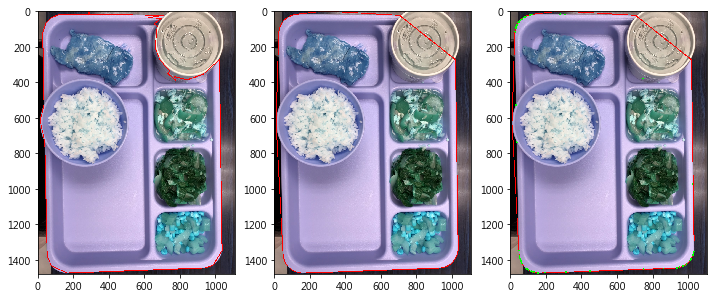

In [255]:
plt.figure(1,figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(approximg)
#print(approx)
plt.subplot(1,3,2)
plt.imshow(convexhullimg)
#print(hull)
plt.subplot(1,3,3)
plt.imshow(convexitydefects)
plt.show()
#print(defects)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./server/img/10272673126340.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(1,figsize=(14,14))
plt.subplot(1,2,1)
plt.imshow(img)
#plt.show()


#img=img.copy()
#         hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)       
hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)       
lower_red = np.array([4, 70, 40])  #5, 90, 70  4, 65, 0
upper_red = np.array([9, 155, 255]) #9, 160, 255  8, 155, 255
mask=cv2.inRange(hsv,lower_red,upper_red)


binary=cv2.threshold(mask,127,255,cv2.THRESH_BINARY)[1]
#binary=cv2.dilate(binary,None,iterations=1)
binary=cv2.dilate(binary,None,iterations=2)
binary=cv2.erode(binary,None,iterations=2)     


cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# # 用绿色(0, 255, 0)来画出最小的矩形框架
# x, y, w, h = cv2.boundingRect(binary)
# xx=cv2.rectangle(img.copy(), (x, y), (x+w, y+h), (0,255, 0), 3)

cnt=cnts[0]


epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

print(approx)



# # 用红色表示有旋转角度的矩形框架
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# print(box)
# xx=cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
# #cv2.imwrite('contours.png', img)


xx = cv2.drawContours(img.copy(), approx , -1, (255,0,0), 6)
plt.figure(1,figsize=(10,10))
plt.subplot(1,2,2)
plt.imshow(xx)
plt.show()


# thr1=h*w/100
# contours_area,filter_contours=[],[]
# for i in range(len(cnts)):
#     cc = cnts[i]
#     area = cv2.contourArea(cc)
#     if(area>thr1):
#         filter_contours.append(cc)
#         contours_area.append(area)
#       #  print('contours area: {}'.format(area))   

# contours_area=sorted(contours_area) 
x=3
print(np.size(cnts))  #   得到该图中总的轮廓数量
print(cnts[x])   #  打印出第一个轮廓的所有点的坐标， 更改此处的0，为0--（总轮廓数-1），可打印出相应轮廓所有点的坐标
print(hiera) #打印出相应轮廓之间的关系